# NBA Players career duration prediction using Naive Bayes Model

## **Introduction**

### In this project, a Naive Bayes model has been implemented. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

### For this project, we provide provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time.

### The data for this project consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. We will first perform the appriopriate data cleaning and feature engineering procedures on the available dataset to make it ready for modelling and the we'll construct the Naive bayes prediction model with appropriate parameters

## **Step 1: Imports** 

Start by importing `pandas`.

In [1]:
#Import relevant libraries

import pandas as pd
import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

The dataset is a .csv file named `nba-players.csv`. It consists of performance records for a subset of NBA players. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
#Import data

data = pd.read_csv("nba-players.csv", index_col=0)

## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of what it entails.

In [3]:
# Display first 10 rows of data.

data.head(10)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


In [28]:
# Display last 10 rows of the data

data.tail(10)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
1330,Adam Keefe,82,18.9,6.6,2.3,4.6,50.0,0.0,0.0,0.0,...,2.9,70.0,2.1,3.2,5.3,1.0,0.7,0.2,1.2,1
1331,Lee Mayberry,82,18.3,5.2,2.1,4.6,45.6,0.5,1.3,39.1,...,0.8,57.4,0.3,1.1,1.4,3.3,0.7,0.1,1.0,1
1332,Hubert Davis,50,16.3,5.4,2.2,5.0,43.8,0.1,0.4,31.6,...,1.1,79.6,0.3,0.9,1.1,1.7,0.4,0.1,0.9,1
1333,Byron Houston,79,16.1,5.3,1.8,4.1,44.6,0.0,0.1,28.6,...,2.5,66.5,1.5,2.5,4.0,0.9,0.6,0.5,1.1,0
1334,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1
1339,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1


In [4]:
# Display number of rows, number of columns.

data.shape

(1340, 21)

- There are 1,340 rows and 21 columns in the data.

In [5]:
# Display all column names.

data.columns

Index(['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p',
       'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
       'target_5yrs'],
      dtype='object')

The following table provides a description of the data in each column. This metadata comes from the data source

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played per game|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

Next, we display a summary of the data to get additional information about the DataFrame, including the types of data in the columns.

In [6]:
# display a summary of the DataFrame.

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1340 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov        

- Based on the preceding tables, the `name` column is categorical, and the rest of the columns are numerical.

In [27]:
# Observe the statistics of the data

data.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.149627,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.051861,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


### Check for missing values

In [7]:
# Display the number of missing values in each column.

data.isna().sum()

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

## **Step 3: Statistical tests** 

We use statistical technique to test the balance of the data. The 'target_5yrs' is our target column which is to be modelled later. To understand how balanced the dataset is in terms of class, we display the percentage of values that belong to each class in the target column. In this context, class 1 indicates an NBA career duration of at least five years, while class 0 indicates an NBA career duration of less than five years.


In [8]:
# Display percentage (%) of values for each class (1, 0) represented in the target column of this dataset.

data["target_5yrs"].value_counts(normalize=True)*100

target_5yrs
1    62.014925
0    37.985075
Name: proportion, dtype: float64

- About 62% of the values in the target columm belong to class 1, and about 38% of the values belong to class 0. In other words, about 62% of players represented by this data have an NBA career duration of at least five years, and about 38% do not. 
- The dataset is not perfectly balanced, but an exact 50-50 split is a rare occurance in datasets, and a 62-38 split is not too imbalanced. However, if the majority class made up 90% or more of the dataset, then that would be of concern, and it would be prudent to address that issue through techniques like upsampling and downsampling. 

## **Step 4: Feature engineering** 


We perform feature engineering, with the goal of identifying and creating features that will serve as useful predictors for the target variable, `target_5yrs`. 

### Feature Selection (with reasoning)

- A player's name is not helpful in determining their career duration. Moreover, it may not be ethical or fair to predict a player's career duration based on a name. Thus we remove the `name` column.
- The number of games a player has played in may not be as important in determining their career duration as the number of points they have earned. So, the `gp` column on its own may not be a helpful feature. However, `gp` and `pts` could be combined to get the total number of points earned across the games played, and that result could be a helpful feature. That approach can be implemented later in the feature engineering process—in feature extraction. 
- If the number of points earned across games will be extracted as a feature, then that could be combined with the number of minutes played across games (`min`) to extract another feature. This could be a measure of players' efficiency and could help in predicting players' career duration. `min` on its own may not be useful as a feature for the same reason as `gp`.
- There are three different columns that give information about field goals. The percent of field goals a player makes (`fg`) says more about their performance than the number of field goals they make (`fgm`) or the number of field goals they attempt (`fga`). The percent gives more context, as it takes into account both how many field goals a player successfully made and how many field goals they attempted in total. This allows for a more meaningful comparison between players. The same logic applies to the percent of three-point field goals made, as well as the percent of free throws made. 
- There are columns for the number offensive rebounds (`oreb`), the number of defensive rebounds (`dreb`), and the number of rebounds overall (`reb`). Because the overall number of rebounds should already incorporate both offensive and defensive rebounds, it would make sense to use the overall as a feature. 
- The number of assists (`ast`), steals (`stl`), blocks (`blk`), and turnovers (`tov`) also provide information about how well players are performing in games, and thus, could be helpful in predicting how long players last in the league. 

Therefore, at this stage of the feature engineering process, it would be most effective to select the following columns: 

`gp`, `min`, `pts`, `fg`, `3p`, `ft`, `reb`, `ast`, `stl`, `blk`, `tov`.

In [10]:
# Select the columns to proceed with and save the DataFrame in new variable `selected_data`.
# Include the target column, `target_5yrs`.

selected_data = data[["gp", "min", "pts", "fg", "3p", "ft", "reb", "ast", "stl", "blk", "tov", "target_5yrs"]]

In [24]:
# Display the first few rows of `selected_data` for reference.

selected_data.head(10)

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1
5,75,11.4,3.7,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0
6,62,10.9,6.6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1
7,48,10.3,5.7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1
8,65,9.9,2.4,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0
9,42,8.5,3.7,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0


### Feature Extraction

- The `gp`, `pts`, `min` columns lend themselves to feature extraction.
  - `gp` represents the total number of games a player has played in, and `pts` represents the average number of points the player has earned per game. It might be helpful to combine these columns to get the total number of points the player has earned across the games and use the result as a new feature, which could be added into a new column named `total_points`. The total points earned by a player can reflect their performance and shape their career longevity. 
  - The `min` column represents the number of minutes played across games. `total_points` could be combined with `min` to extract a new feature: points earned per minute. This can be considered a measure of player efficiency, which could shape  career duration. This feature can be added into a column named `efficiency`.

In [25]:
# Extract two features that would help predict target_5yrs.
# Make a copy of `selected_data` 

extracted_data = selected_data.copy()

# Add a new column named `total_points`; 

extracted_data["total_points"] = extracted_data["gp"] * extracted_data["pts"]

# Add a new column named `efficiency`

extracted_data["efficiency"] = extracted_data["total_points"] / extracted_data["min"]

# Display the first few rows of `extracted_data` to confirm that the new columns were added.

extracted_data.head(10)

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
5,75,11.4,3.7,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
6,62,10.9,6.6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
7,48,10.3,5.7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
8,65,9.9,2.4,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576
9,42,8.5,3.7,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,18.282353


Now, to prepare for the Naive Bayes model, we clean the extracted data and ensure ensure it is concise.

In [26]:
# Remove any columns from `extracted_data` that are no longer needed.

# Remove `gp`, `pts`, and `min` from `extracted_data`.

extracted_data = extracted_data.drop(columns=["gp", "pts", "min"])

# Display the first few rows of `extracted_data` to ensure that column drops took place.

extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,18.282353


Next, we export the extracted data as a new .csv file. 

In [15]:
# Export the extracted data.

extracted_data.to_csv("extracted_nba_players_data.csv", index=0)

- The following attributes about player performance could help predict their NBA career duration and should be included in a presentation to stakeholders: field goals, three-point field goals, free throws, rebounds, assists, steals, blocks, turnovers, total points, and efficiency as points per minute. 
- It would be important to explain that these attributes, along with a relevant dataset, will be used in the next stage of the project. At that point, a model will be built to predict a player's career duration. Insights gained will be shared with stakeholders once the project is complete. Stakeholders would also appreciate being provided with a timeline and key deliverables that they can expect to receive.

## Step 5: Model preparation

### Isolate the target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [16]:
# Define the y (target) variable.

y = extracted_data['target_5yrs']

# Define the X (predictor) variables.

X = extracted_data.drop('target_5yrs', axis = 1)

In [17]:
# Display the first 10 rows of target data.

y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

In [18]:
# Display the first 10 rows of predictor variables.

X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,18.282353


The target variable is binary and the predictor variables are continuous numerical values. Hence we should choose a model suitable for these conditions

### Perform a split operation on  data

We divide data into a training set (75% of data) and test set (25% of data). 

In [19]:
# Perform the split operation on data.

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
# Print the shape (rows, columns) of the output from the train-test split.

print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


## Step 6: Model building

Using the assumption that the features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for your data.

### Fitting model to training data and predicting on the test data

By creating a model, we will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. We will use this to predict `target_5yrs` from `y_train`.

In [21]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

nb = naive_bayes.GaussianNB()

# Fit the model on training data.

nb.fit(X_train, y_train)

# Apply  model to predict on test data. 

y_pred = nb.predict(X_test)

## Step 7: Results and evaluation

### Leverage metrics to evaluate model's performance

We evaluate the model by leverageing and printing the accuracy score, precision score, recall score, and f1 score associated with the test data and predicted values.

In [22]:
print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))


print('precision score:'), print(metrics.precision_score(y_test, y_pred))


print('recall score:'), print(metrics.recall_score(y_test, y_pred))


print('f1 score:'), print(metrics.f1_score(y_test, y_pred))

accuracy score:
0.6985074626865672
precision score:
0.8211920529801324
recall score:
0.6262626262626263
f1 score:
0.7106017191977076


(None, None)

## Preliminary evaluation

- The accuracy score for this model is 0.6985, or 69.9% accurate. In classification problems, accuracy is useful to know but may not be the best metric by which to evaluate this model. While accuracy is often the most intuitive metric, it is a poor evaluation metric in some cases. In particular, if you have imbalanced classes, a model could appear accurate but be poor at balancing false positives and false negatives.

- Precision and recall scores are both useful to evaluate the correct predictive capability of a model because they balance the false positives and false negatives inherent in prediction.

- The model shows a precision score of 0.8212, suggesting the model is quite good at predicting true positives—meaning the player will play longer than five years—while balancing false positives. The recall score of 0.6263 shows worse performance in predicting true negatives—where the player will not play for five years or more—while balancing false negatives.These two metrics combined can give a better assessment of model performance than accuracy does alone.

- The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.7106, which suggests reasonable predictive power in this model.

### Gaining clarity with the confusion matrix

A confusion matrix is a graphic that shows model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metri

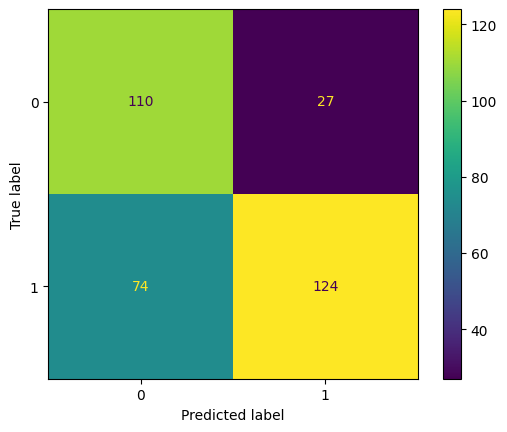

In [23]:
# Construct the confusion matrix for the predicted and test values.

cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line.

disp.plot()

## Considerations:


- The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.

- The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8212).

- True negatives and false negatives are closer in number, which explains the worse recall score.

- The evaluation of the model is important to inform if the model has delivered accurate predictions.

- Splitting the data was important for ensuring that there was new data for the model to test its predictive performance.

- Each metric provided an evaluation from a different standpoint, and accuracy alone was not a strong way to evaluate the model.

- Effective assessments balance the true/false positives versus true/false negatives through the confusion matrix and F1 score.



## Conculsion:

- ### The model created provides some value in predicting an NBA player's chances of playing for five years or more.

- ### Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.